In [142]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [143]:
df = pd.read_excel('cleaned_data.xlsx')
df = df.drop(columns = ['Unnamed: 0'])

In [144]:
# #Checking for missing values  
# (df.isnull().sum()/1065)*100

name_of_the_fund_lst               0.000000
aum_funds_individual_lst           0.000000
nav_funds_individual_lst           0.000000
Exit_Load_lst                      0.093897
rating_of_funds_individual_lst    31.173709
minimum_funds_individual_lst       0.093897
pe                                38.028169
pb                                38.028169
debt_per                           0.000000
equity_per                         0.000000
average_maturity                  53.239437
yield_to_maturity                 54.366197
name_of_the_fund                   0.000000
risk_of_the_fund                   0.000000
type_of_fund                       0.000000
one_year_returns                   9.295775
three_year_returns                23.286385
five_year_returns                 34.647887
link_of_the_funds                  0.000000
dtype: float64

As we can see there missing values are more than 50 percent in average_maturity and  yield_to_maturity lets drop these columns                           

In [145]:
# #The columns one, 3, 5 year returns are missing becuase the underlying fund might not be there 1,3,5 years ago. So let's go ahead and remove those rows
# df.drop(axis =0 , index = df.loc[df['three_year_returns'].isnull()].index).isnull().sum()/696*100
# #As we can see when we eliminate the rows which have 3 year returns as nan, the 1 year and 5 year returns missing values have been decreased because they are linked to each other 
# #If we remove 5 year returns all the missing values will be removed, however, in order for us to preserve data we need to eliminate 3 year return data 

name_of_the_fund_lst               0.000000
aum_funds_individual_lst           0.000000
nav_funds_individual_lst           0.000000
Exit_Load_lst                      0.143678
rating_of_funds_individual_lst    17.241379
minimum_funds_individual_lst       0.143678
pe                                45.833333
pb                                45.833333
debt_per                           0.000000
equity_per                         0.000000
average_maturity                  57.758621
yield_to_maturity                 59.339080
name_of_the_fund                   0.000000
risk_of_the_fund                   0.000000
type_of_fund                       0.000000
one_year_returns                   0.000000
three_year_returns                 0.000000
five_year_returns                 17.385057
link_of_the_funds                  0.000000
dtype: float64

In [146]:
# df = df.drop(axis = 0, index = df.loc[df['three_year_returns'].isnull()].index)

In [147]:
# #Let's remove columns which have more than 30% of data missing. 
# df = df.drop(columns = ['average_maturity','yield_to_maturity','pe','pb','Exit_Load_lst','link_of_the_funds','name_of_the_fund','name_of_the_fund_lst'])

In [148]:
# #AUM column has values in the format of ₹1,711.78Cr 
# #We need to split it now. 
# # df['aum_funds_individual_lst'] = df['aum_funds_individual_lst'].apply(map(lambda x:x.split('Cr')[0].split('₹')[1].replace(',','')))
# lst = []
# lst_1 = []
# for x in range(0,len(df['aum_funds_individual_lst'])):
#     try:
#         lst.append(float(df['aum_funds_individual_lst'][x].replace('₹','').replace('Cr','').replace(',','')) )
#     except ValueError:
#         lst.append(np.nan)
        
# for y in range(0,len(df['nav_funds_individual_lst'])):  
#     if df['nav_funds_individual_lst'][y].isnumeric() == False:
#         lst_1.append(df['nav_funds_individual_lst'][y].replace(',',''))
#     else :
#         lst_1.append(df['nav_funds_individual_lst'][y])
    

In [149]:
# df['aum_funds_individual_lst'] = lst
# df['nav_funds_individual_lst'] = lst_1

In [150]:
df.describe()

,aum_funds_individual_lst,minimum_funds_individual_lst,debt_per,equity_per,one_year_returns,three_year_returns,five_year_returns
count,816.000000,816.000000,817.000000,817.000000,817.000000,817.000000,696.000000
mean,3647.397341,1303.875417,47.638210,50.751459,3.743023,11.488237,8.813463
std,6809.450062,3816.492116,44.756988,44.790123,6.849319,7.212429,3.851759
min,1.260000,1.260000,-1.149997,0.000000,-38.870000,-14.350000,-3.120000
25%,173.885000,125.145000,3.484700,0.000000,2.050000,5.640000,6.167500
50%,920.035000,500.000000,28.580000,67.393316,3.570000,10.200000,7.740000
75%,3577.500000,500.000000,100.000000,96.370000,4.910000,15.610000,11.432500
max,60186.790000,50128.840000,100.018321,101.150000,63.050000,42.730000,27.400000


In [151]:
df = df.fillna({'rating_of_funds_individual_lst':df['rating_of_funds_individual_lst'].mode()[0],
                                    'minimum_funds_individual_lst':df['minimum_funds_individual_lst'].mean(),
                                    'five_year_returns':df['five_year_returns'].mean(),
                                    'aum_funds_individual_lst':df['aum_funds_individual_lst'].mean()
                                   })
df = df.drop(columns = ['minimum_funds_individual_lst'])

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


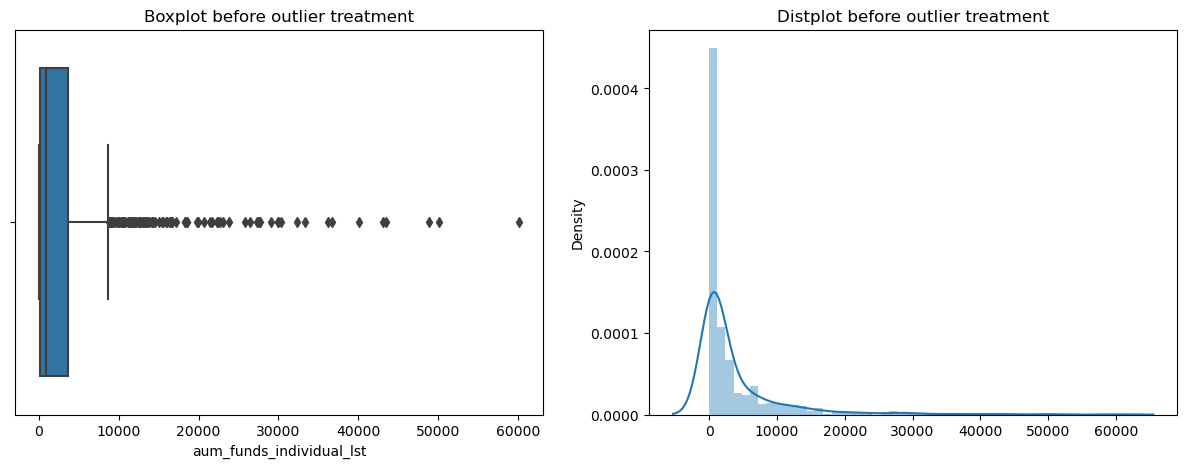

In [152]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['aum_funds_individual_lst']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['aum_funds_individual_lst']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


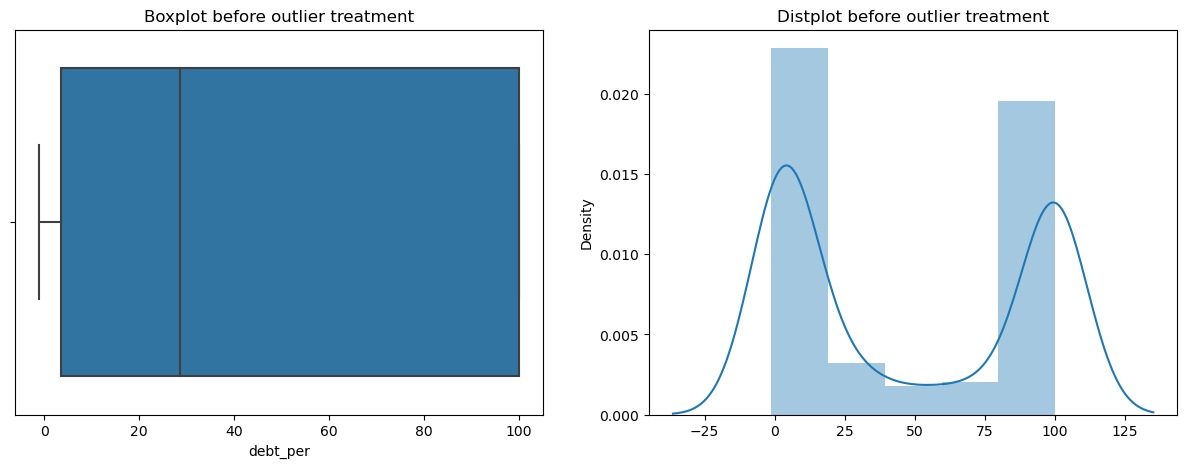

In [153]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['debt_per']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['debt_per']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


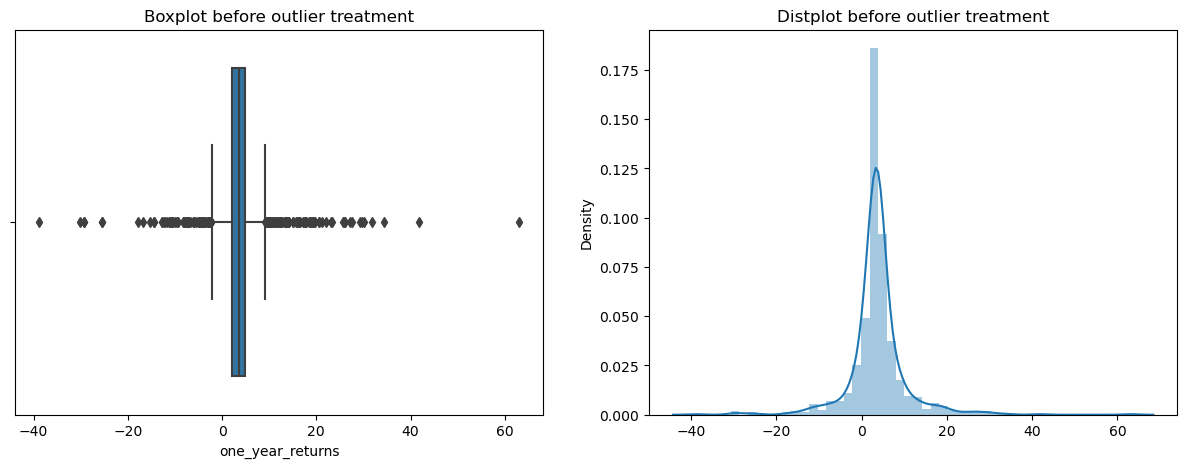

In [154]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['one_year_returns']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['one_year_returns']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


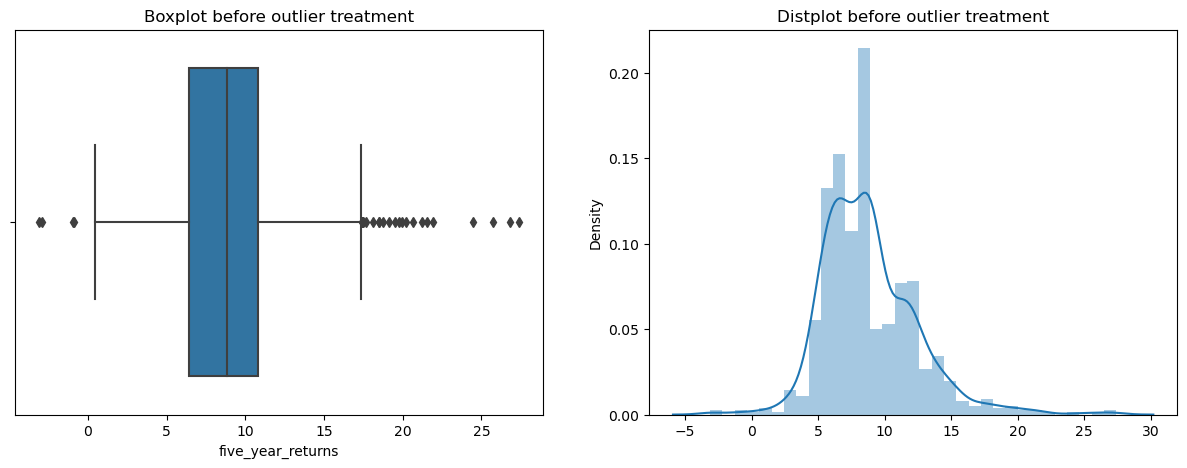

In [155]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['five_year_returns']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['five_year_returns']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


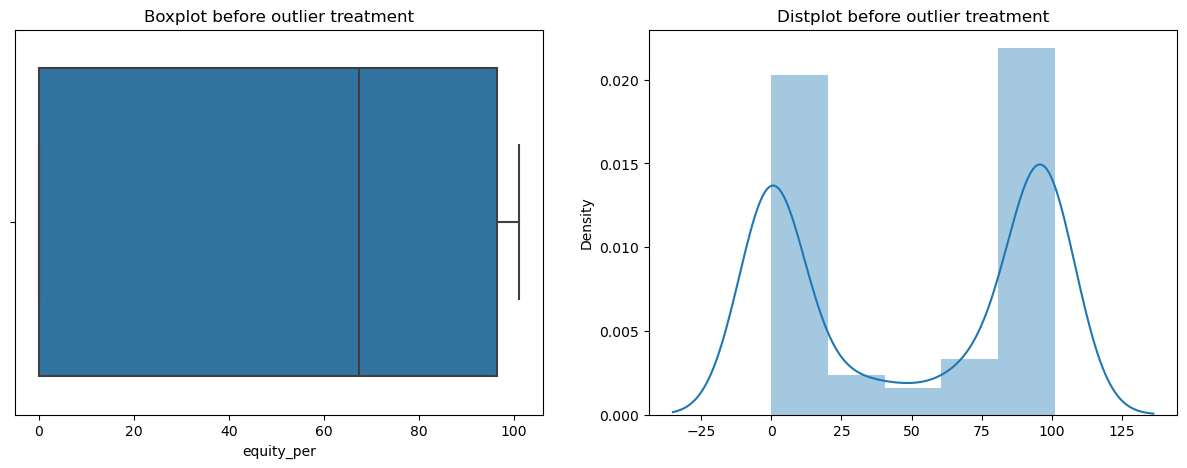

In [156]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['equity_per']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['equity_per']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


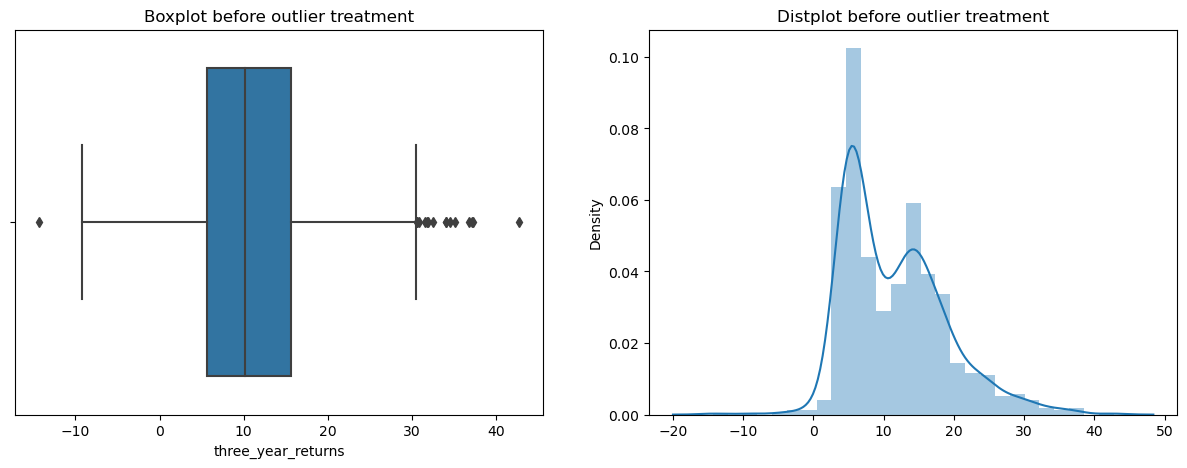

In [157]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['three_year_returns']).set(title='Boxplot before outlier treatment')
sns.distplot(ax = axes[1],x =df['three_year_returns']).set(title='Distplot before outlier treatment')

# plt.savefig('report.png')
plt.show()

In [158]:
df['aum_funds_individual_lst'] = np.where(df["aum_funds_individual_lst"] >df["aum_funds_individual_lst"].quantile(0.75), df["aum_funds_individual_lst"].mean(),df["aum_funds_individual_lst"])
df['debt_per'] = np.where(df["debt_per"] >df["debt_per"].quantile(0.95), df["debt_per"].mean(),df["debt_per"])
df['one_year_returns'] = np.where(df["one_year_returns"] >df["one_year_returns"].quantile(0.75), df["one_year_returns"].mean(),df["one_year_returns"])
df['equity_per'] = np.where(df["equity_per"] >df["equity_per"].quantile(0.95), df["equity_per"].mean(),df["equity_per"])
df['three_year_returns'] = np.where(df["three_year_returns"] >df["three_year_returns"].quantile(0.95), df["three_year_returns"].mean(),df["three_year_returns"])
df['five_year_returns'] = np.where(df["five_year_returns"] >df["five_year_returns"].quantile(0.95), df["five_year_returns"].mean(),df["five_year_returns"])

df['aum_funds_individual_lst'] = df['aum_funds_individual_lst']  / df['aum_funds_individual_lst'].abs().max()
df['debt_per'] = df['debt_per']  / df['debt_per'].abs().max()
df['one_year_returns'] = df['one_year_returns']  / df['one_year_returns'].abs().max()
df['equity_per'] = df['equity_per']  / df['equity_per'].abs().max()
df['three_year_returns'] = df['three_year_returns']  / df['three_year_returns'].abs().max()
df['five_year_returns'] = df['five_year_returns']  / df['five_year_returns'].abs().max()



C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


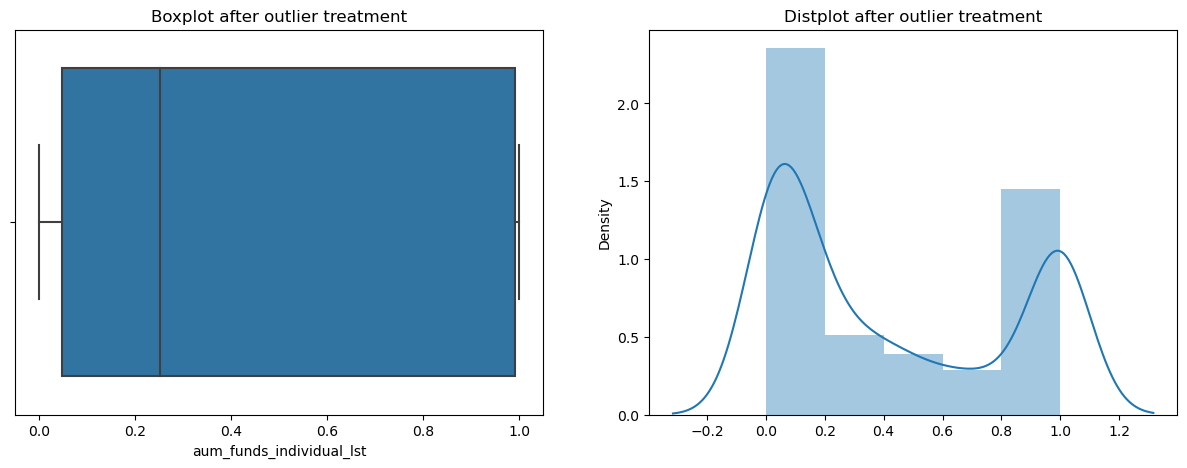

In [159]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['aum_funds_individual_lst']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['aum_funds_individual_lst']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


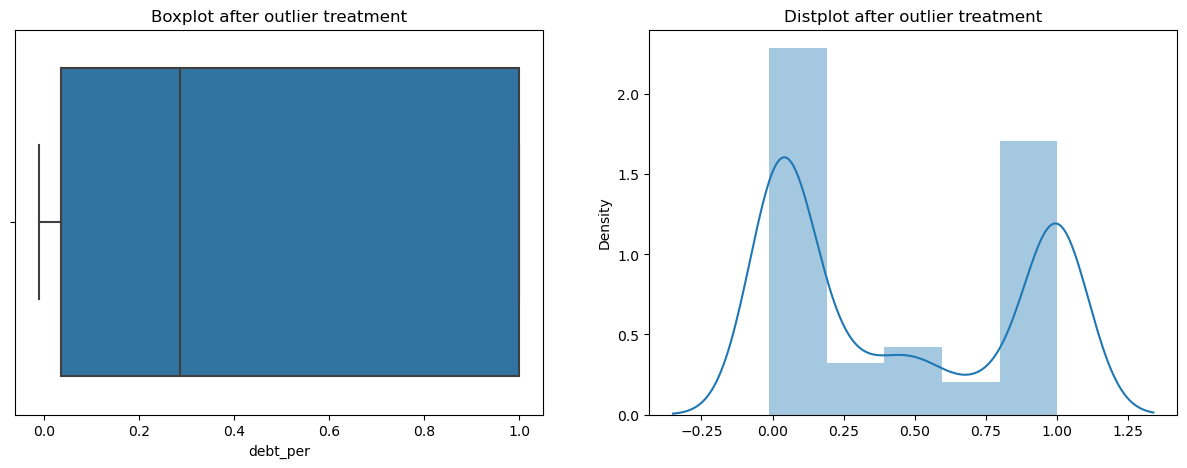

In [160]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['debt_per']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['debt_per']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


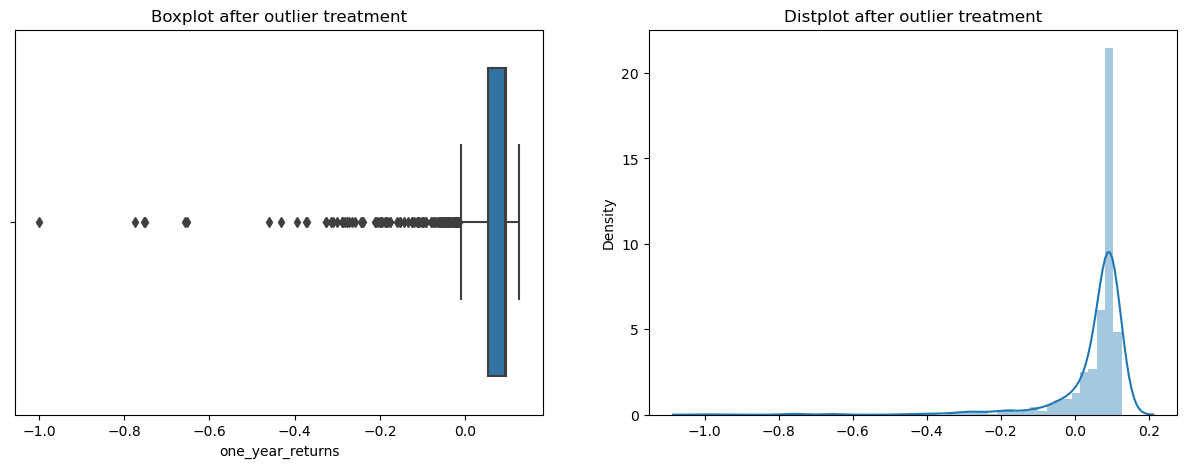

In [161]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['one_year_returns']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['one_year_returns']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


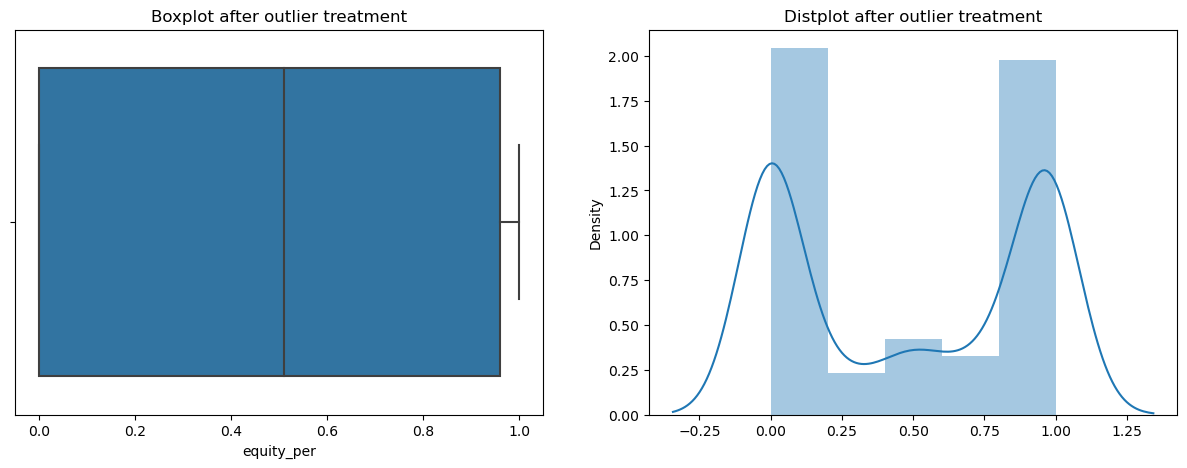

In [162]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['equity_per']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['equity_per']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


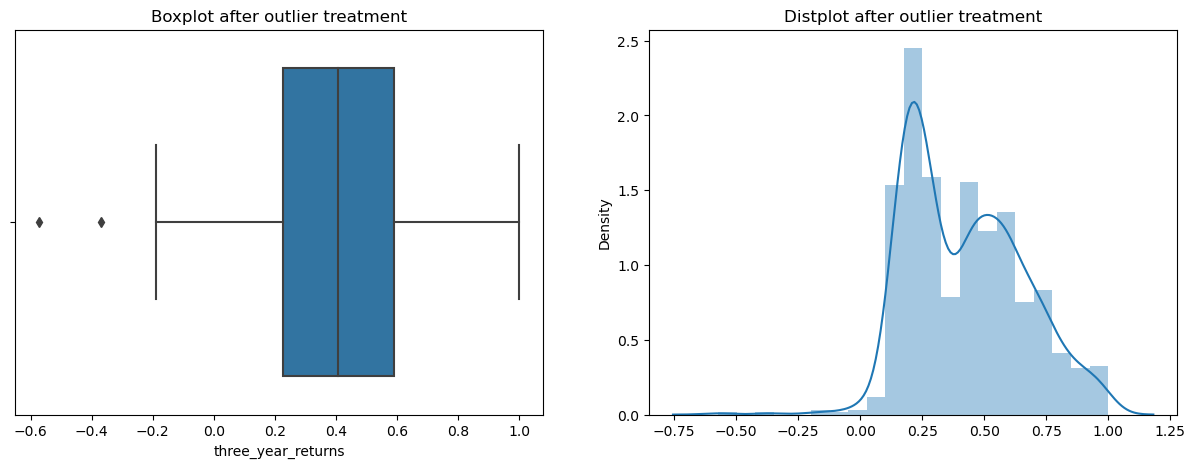

In [163]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['three_year_returns']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['three_year_returns']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


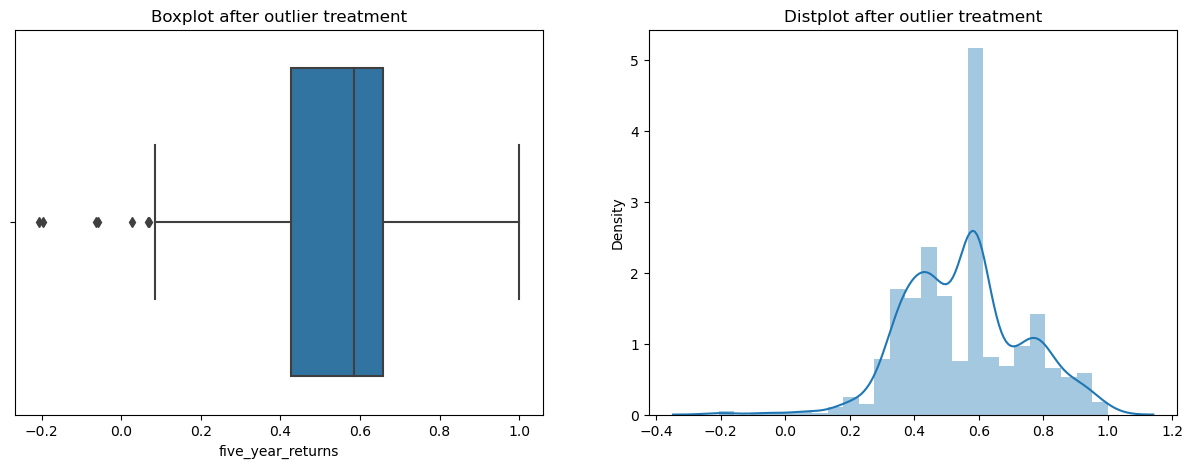

In [164]:
#Here we are checking if there are any outliers present in the Price column
#As we can see that there are outliers beyond the 0.75 quantile from the Box plot

figure, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x = df['five_year_returns']).set(title='Boxplot after outlier treatment')
sns.distplot(ax = axes[1],x =df['five_year_returns']).set(title='Distplot after outlier treatment')

# plt.savefig('report.png')
plt.show()

In [165]:
#Here  we are pre processing the data and prepaing the data for analysis 
from sklearn import preprocessing 
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    res_df['rating_of_funds_individual_lst'] = le.fit_transform(res_df['rating_of_funds_individual_lst'])
    res_df['type_of_fund'] = le.fit_transform(res_df['type_of_fund'])
    res_df['risk_of_the_fund'] = le.fit_transform(res_df['risk_of_the_fund'])
    return res_df
new_df = preprocessor(df)

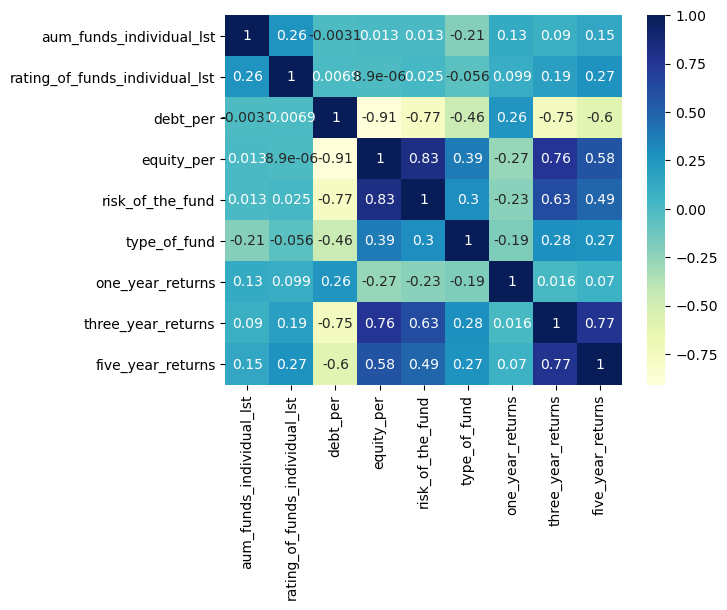

In [166]:
# plotting correlation heatmap
dataplot = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [167]:
#As we can see we have removed all the null values 
from sklearn.model_selection import train_test_split
import sklearn.metrics 
import math  


In [168]:
x_train, x_test, y_train, y_test = train_test_split(new_df.drop(['five_year_returns'],axis=1),
                                                    new_df['five_year_returns'],test_size=0.30)

r2_score:  0.6124470693086683
Mean absolute error: 0.09
Root mean squared error:  0.1136814840708416
Adjusted r2_score:  0.6358031016128124


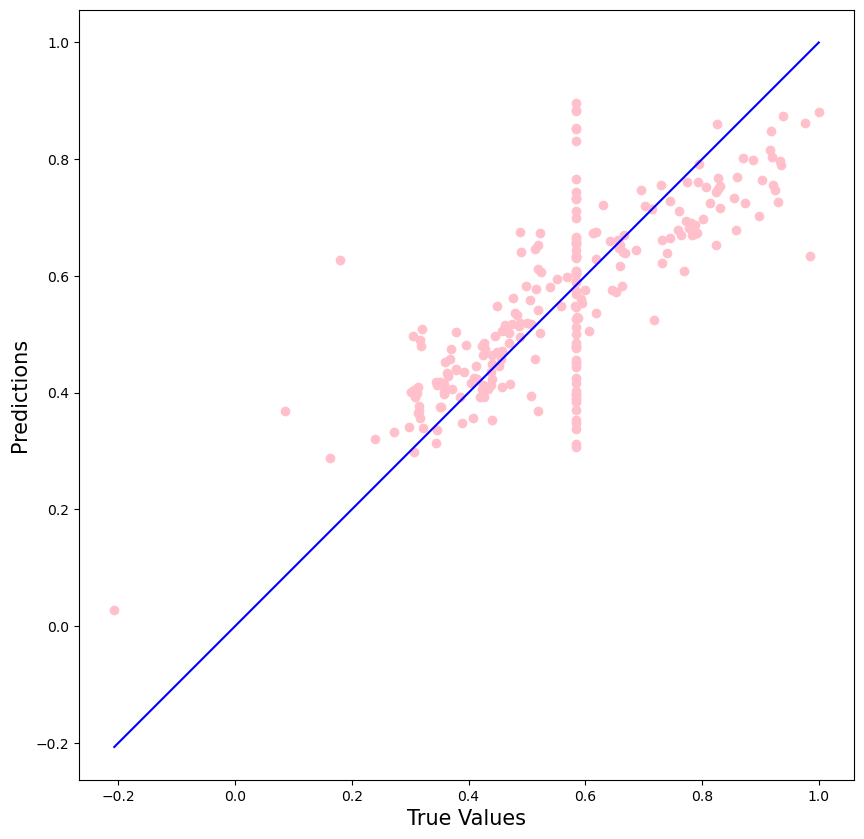

In [169]:
from sklearn import linear_model 

reg_model = linear_model.LinearRegression() # making regression model
reg_model.fit(x_train, y_train) #Here we are fitting the data set as an x_train and y_train

prediction = reg_model.predict(x_test) #Here we are predicting the test data

print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

r2_score:  -5.6573754396029915e+29
Mean absolute error: 55652305512357.45
Root mean squared error:  137350967260362.45
Adjusted r2_score:  -5.8731228080624275e+29


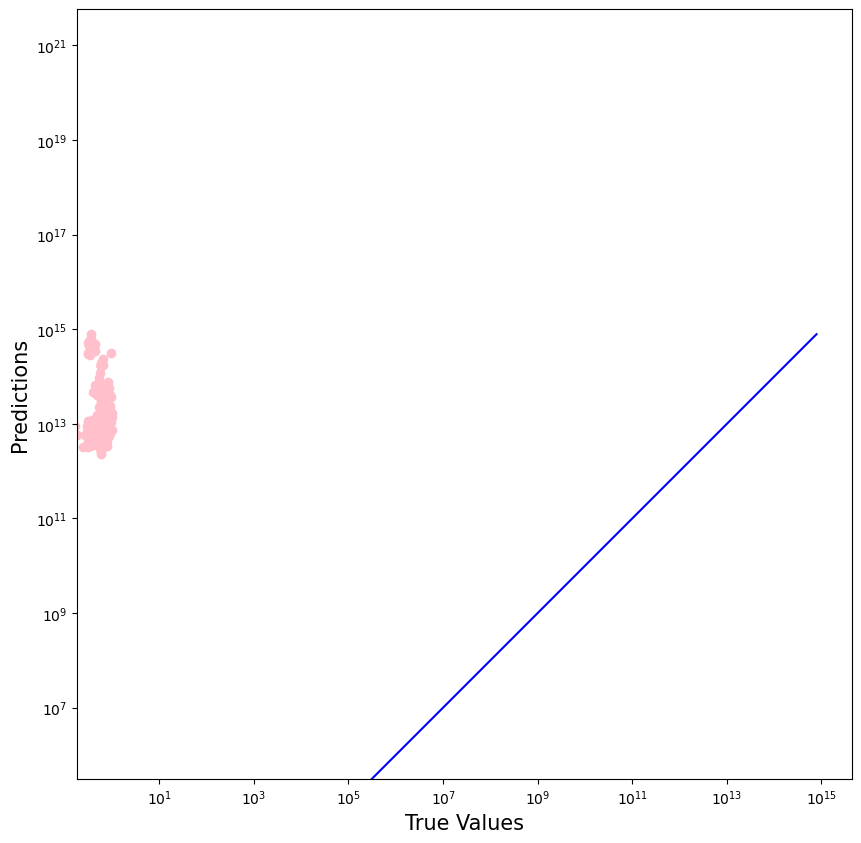

In [170]:
from sklearn.linear_model import SGDRegressor #SGD regreessor is a build in library which we can import
sgd_regressor_model = SGDRegressor(max_iter=100)  # increasing this value leads to over fitting
sgd_regressor_model.fit(x_train,y_train)

prediction = sgd_regressor_model.predict(x_test)

print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)


plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


r2_score:  0.7551048113766576
Mean absolute error: 0.06
Root mean squared error:  0.09036793289469666
Adjusted r2_score:  0.7839011813020387


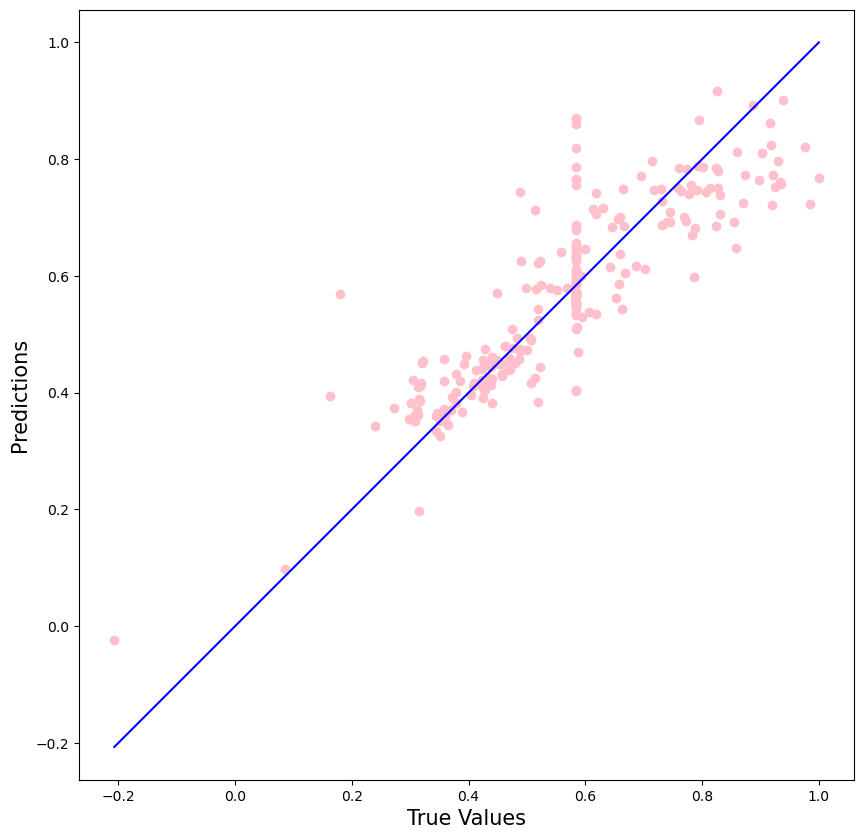

In [171]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(x_train,y_train)

prediction = random_forest_regressor_model.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


r2_score:  0.614834377136743
Mean absolute error: 0.07
Root mean squared error:  0.11333080689993923
Adjusted r2_score:  0.6382814508411103


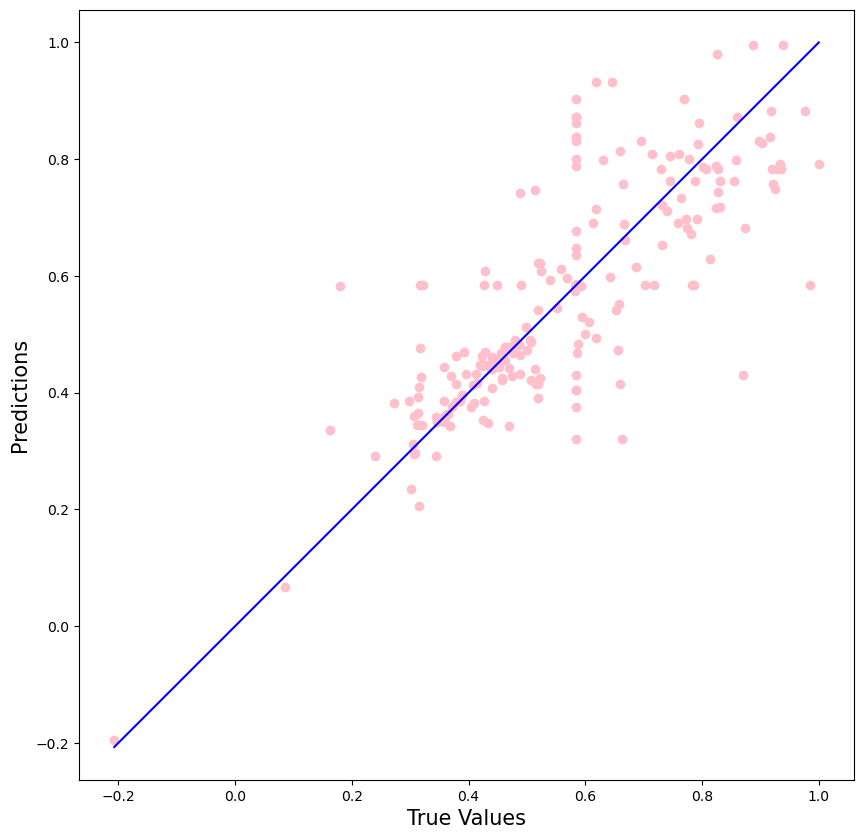

In [172]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor_model = DecisionTreeRegressor()
decision_tree_regressor_model.fit(x_train,y_train)

prediction = decision_tree_regressor_model.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


r2_score:  0.6087712603723296
Mean absolute error: 0.09
Root mean squared error:  0.11421932704773062
Adjusted r2_score:  0.6319871135221219


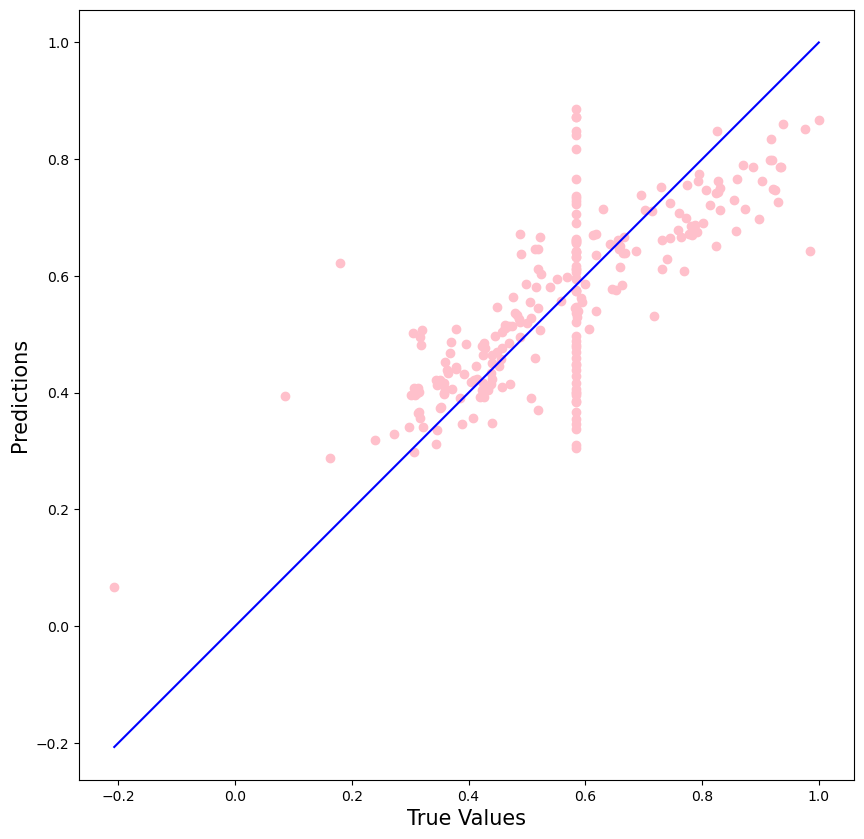

In [173]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)
Ridge()
prediction = clf.predict(x_test)

print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)


plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


r2_score:  0.4557285400663005
Mean absolute error: 0.10
Root mean squared error:  0.13471997782958098
Adjusted r2_score:  0.4731080182891678


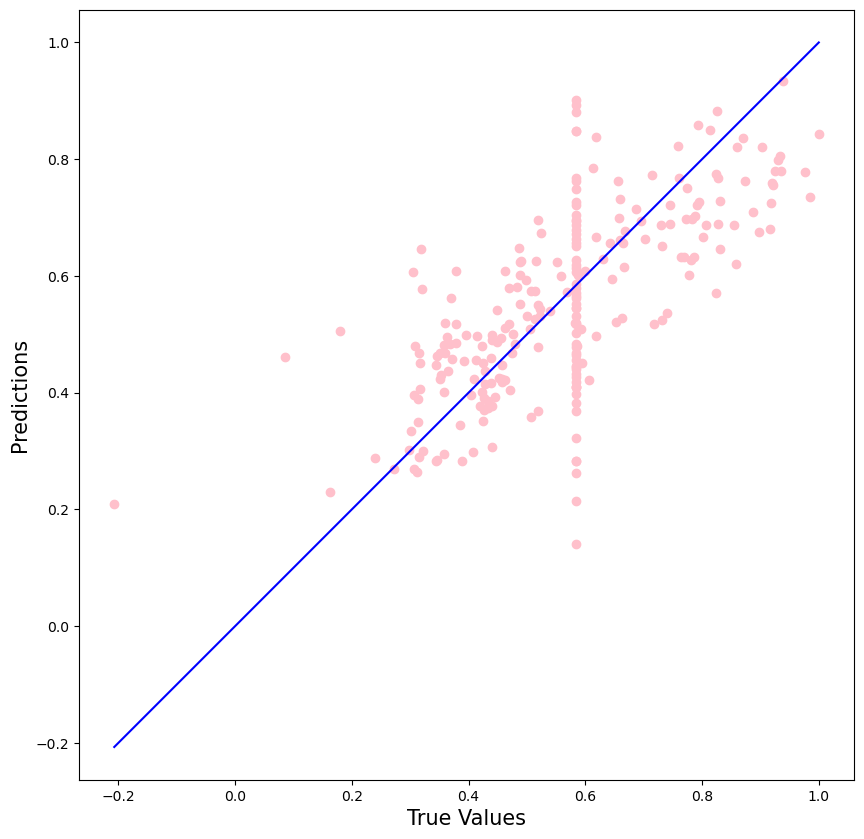

In [174]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
regr = MLPRegressor(random_state=40).fit(x_train, y_train)
prediction = regr.predict(x_test)

print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
r2 = sklearn.metrics.r2_score(y_test,prediction)


r2_score:  0.16308356098845855
Mean absolute error: 0.12
Root mean squared error:  0.16705722809362072
Adjusted r2_score:  0.16930284933123874


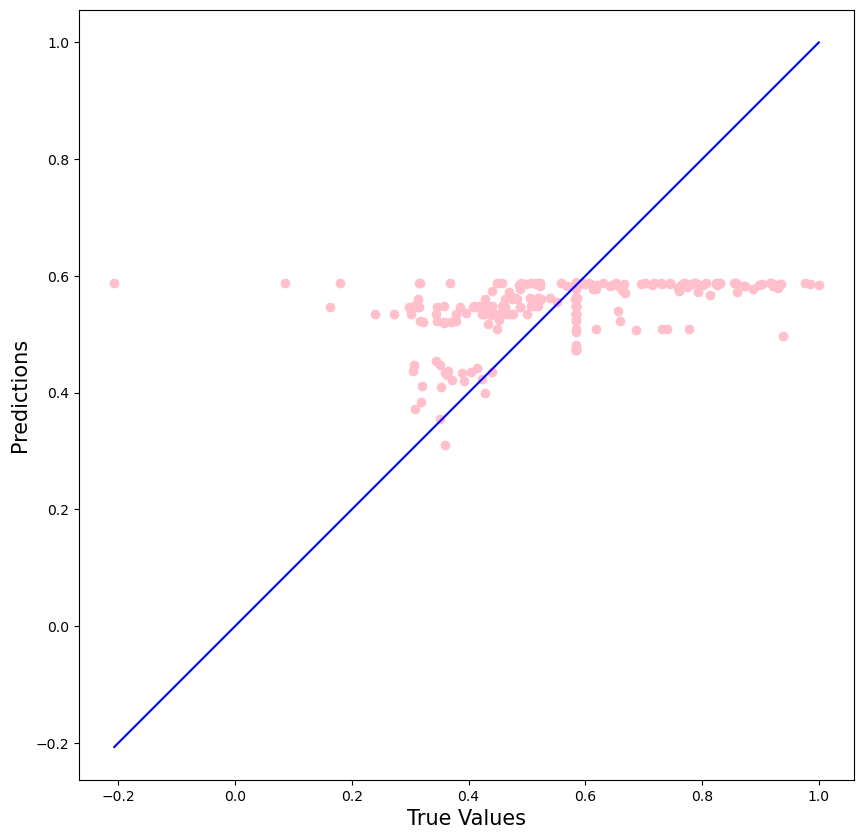

In [175]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
prediction = lasso.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [176]:
feature_importance = random_forest_regressor_model.feature_importances_
feature_importance

array([0.03230523, 0.09722176, 0.05928631, 0.02499286, 0.0310447 ,
       0.01045579, 0.00726727, 0.03074639, 0.70667968])

In [177]:
columns = list(x_train.columns)
columns


['aum_funds_individual_lst',
 'nav_funds_individual_lst',
 'rating_of_funds_individual_lst',
 'debt_per',
 'equity_per',
 'risk_of_the_fund',
 'type_of_fund',
 'one_year_returns',
 'three_year_returns']

In [178]:
feature_importance_value = []
for i in range(len(feature_importance)):
    feature_importance_value.append(round(feature_importance[i],5))
feature_importance_value

[0.03231,
 0.09722,
 0.05929,
 0.02499,
 0.03104,
 0.01046,
 0.00727,
 0.03075,
 0.70668]

In [179]:
 # making a dataframe
feature_importance_df = pd.DataFrame({"Features":columns,
                                     "Values":feature_importance_value })
feature_importance_df

,Features,Values
0,aum_funds_individual_lst,0.03231
1,nav_funds_individual_lst,0.09722
2,rating_of_funds_individual_lst,0.05929
3,debt_per,0.02499
4,equity_per,0.03104
5,risk_of_the_fund,0.01046
6,type_of_fund,0.00727
7,one_year_returns,0.03075
8,three_year_returns,0.70668


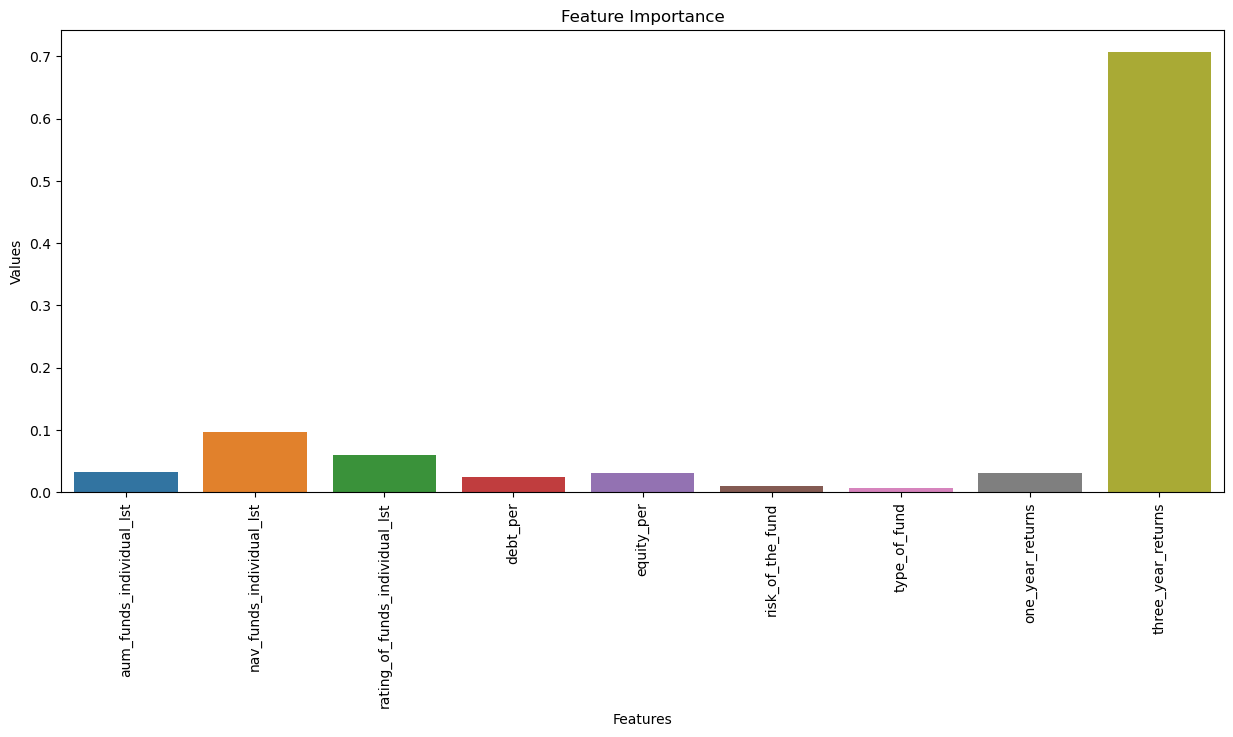

In [180]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

In [208]:
n_estimators = [1,2,3,5,20,50,100,1000,6,8,4,200,250,500,460,240,230,450,900,800] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 600, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [1,2, 6, 10,12,16,18,20,100,1000,250,500,360,200,300] # minimum sample number to split a node
min_samples_leaf = [1, 2, 4,10,20,40,5,1000,100] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [209]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [210]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [211]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 489 out of 500 | elapsed:   13.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 63, 117, 170, 224,
                                                      278, 331, 385, 439, 492,
                                                      546, 600],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             40, 5, 1000, 100],
                                        'min_samples_split': [1, 2, 6, 10, 12,
                                                              16, 18, 20, 100,
                                                              1000, 250, 500,
                                                              360, 200, 300],
                                        'n_estimators': [1, 2, 

In [212]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 2, 3, 5, 20, 50, 100, 1000, 6, 8, 4, 200, 250, 500, 460, 240, 230, 450, 900, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 63, 117, 170, 224, 278, 331, 385, 439, 492, 546, 600], 'min_samples_split': [1, 2, 6, 10, 12, 16, 18, 20, 100, 1000, 250, 500, 360, 200, 300], 'min_samples_leaf': [1, 2, 4, 10, 20, 40, 5, 1000, 100], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}  



r2_score:  0.7679037889995816
Mean absolute error: 0.06
Root mean squared error:  0.08797479168002462
Adjusted r2_score:  0.7971882555292267


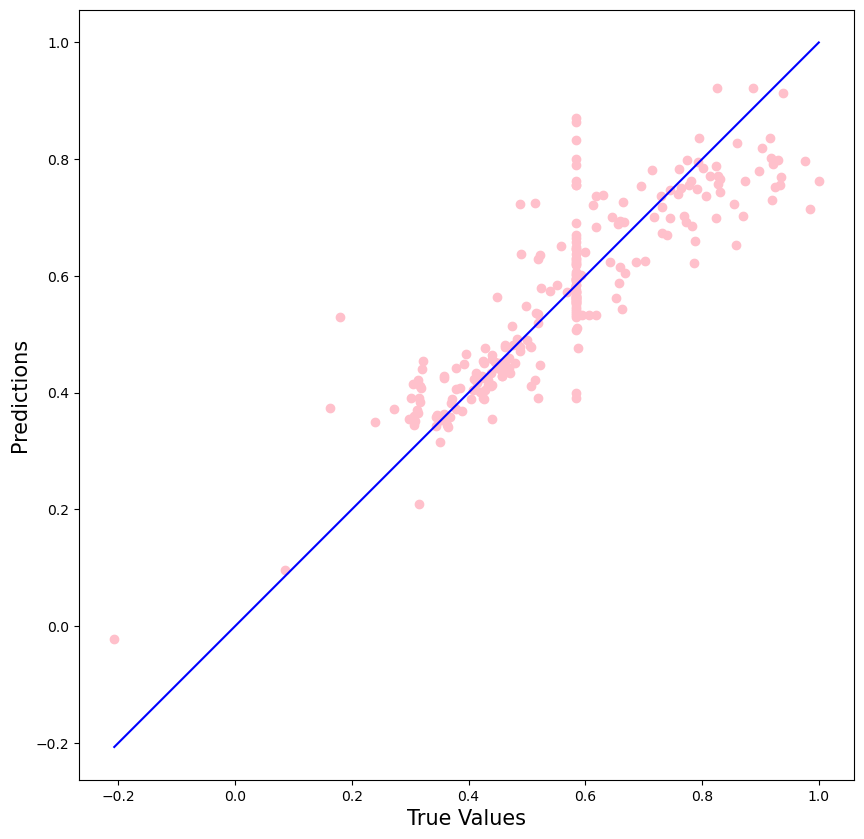

In [225]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(x_train,y_train)

prediction = random_forest_regressor_model.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [226]:
#Saving the model 
import pickle
pickle.dump(random_forest_regressor_model, open('model_five_year_returns.pkl', 'wb'))

r2_score:  0.7679037889995816
Mean absolute error: 0.06
Root mean squared error:  0.08797479168002462
Adjusted r2_score:  0.7971882555292267


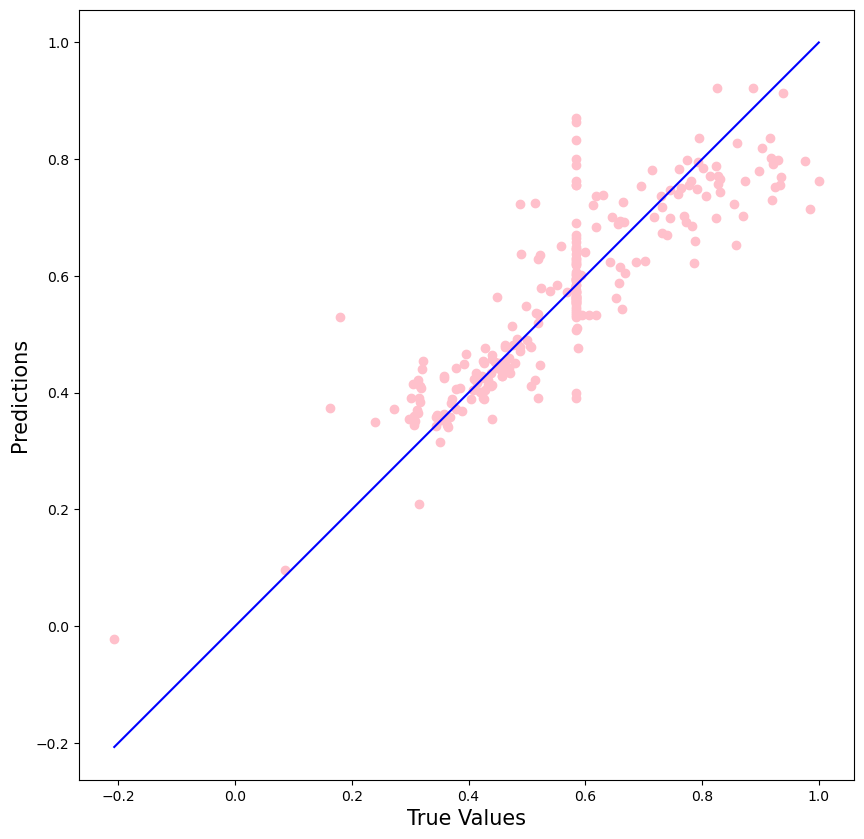

In [228]:
#Unpickling the model and testing the model
pickled_model = pickle.load(open('model_five_year_returns.pkl', 'rb'))
prediction = pickled_model.predict(x_test)


print("r2_score: ",sklearn.metrics.r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % sklearn.metrics.mean_absolute_error(y_test,prediction))# To cut the error in 2 decimal places
print("Root mean squared error: ", math.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction)))
r2 = sklearn.metrics.r2_score(y_test,prediction)
Adj_r2 = 1 - (1-r2 * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted r2_score: ",Adj_r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='pink')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


# Let me know if you have any suggestion 
# Email: - rmsrinivas199627@gmail.com